### Read in figure images and save as nifti

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import glob
from PIL import Image

## Everything should be a function with top loop going through figures from glob:
 * function(paperName, figureName)):

In [2]:
tiffImgPath = glob.glob('../paper_images/Bongioanni_2021_all/Bongioanni_2021aa_Fig1/*.tiff')
nothing, paper_images, paperName, figureName, figureNumber = tiffImgPath[0].split('/')
niftiOutpath = '../image2nifti/%s/%s' % (paperName,figureName)
figureNumber = figureNumber.split('tiff')[0]

In [3]:
tiffImgs = []
for i in tiffImgPath:
    tiffImgs.append(np.array(Image.open(i)))

### Can extract functional activation clusters (grey has same RGB values)
#### Formula to convert from RGB to grayscale: 
 * L = R * 2125/10000 + G * 7154/10000 + B * 0721/10000

#### Extract grayscale image:

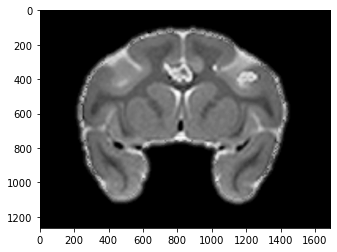

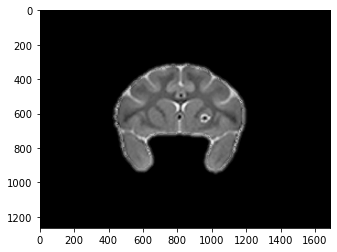

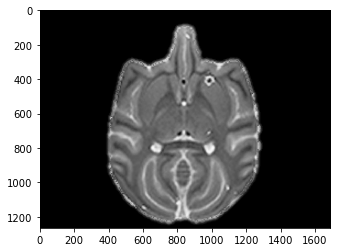

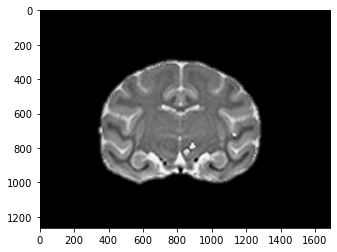

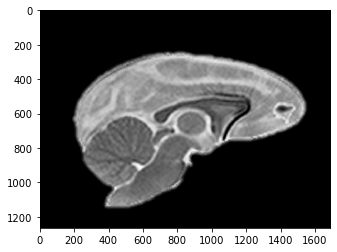

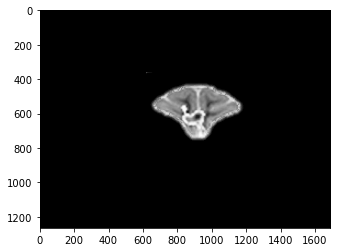

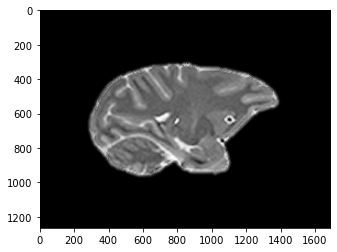

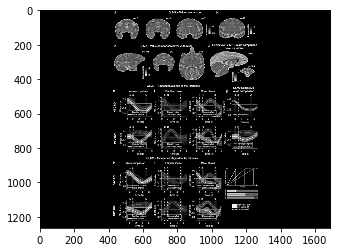

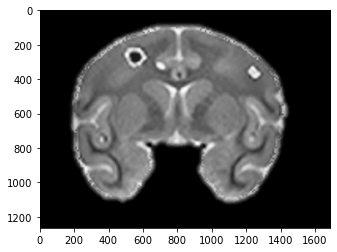

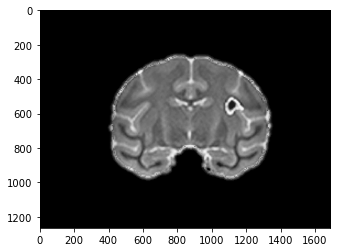

In [4]:
tiffImgs_grey = []
for i in range(len(tiffImgs)):
    tiffImg = tiffImgs[i]
    R = tiffImg[:,:,0]
    G = tiffImg[:,:,1]
    B = tiffImg[:,:,2]
    L = R*0.2125+G*0.7174+B*0.0721
    tiffImgs_grey.append(L)
    plt.figure()
    plt.imshow(L,cmap='Greys')

#### Extract functional clusters:
 * Find where RGB are not equal

In [5]:
x,y,rgb = tiffImgs[0].shape
structImg = tiffImgs[0].copy()

##### Do this in 1 line:


In [6]:
funcImg = tiffImgs[0].copy()
for i in range(x):
    for j in range(y):
        if funcImg[i,j,0] == funcImg[i,j,1]:
            funcImg[i,j,:] = 0

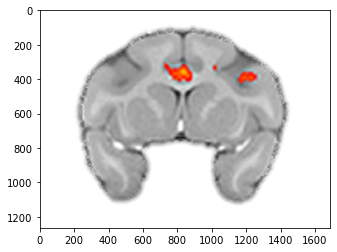

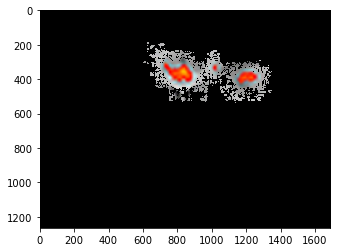

In [7]:
plt.figure()
plt.imshow(tiffImgs[0])
plt.figure()
plt.imshow(funcImg)

#### Save grayscale MRI image and functional cluster image:

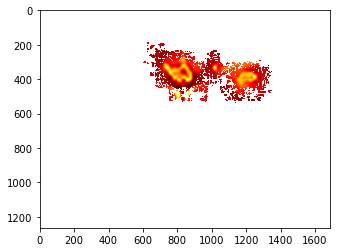

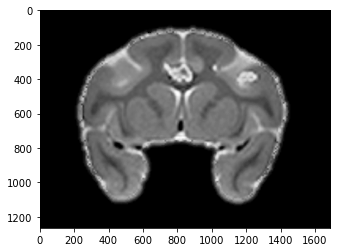

In [8]:
flatFuncImg = funcImg.reshape([funcImg.shape[0]*funcImg.shape[1],funcImg.shape[2]])
funcGrayscaleFlat = []
for i in range(flatFuncImg.shape[0]):
    funcGrayscaleFlat.append(flatFuncImg[i,0] * 2125/10000 + flatFuncImg[i,1] * 7154/10000 + flatFuncImg[i,2] * 721/10000)
funcGrayscaleData = np.array(funcGrayscaleFlat).reshape([funcImg.shape[0],funcImg.shape[1],1])
plt.figure()
plt.imshow(funcGrayscaleData[:,:,0],cmap='hot_r')

flatStructImg = structImg.reshape([structImg.shape[0]*structImg.shape[1],structImg.shape[2]])
structGrayscaleFlat = []
for i in range(flatStructImg.shape[0]):
    structGrayscaleFlat.append(flatStructImg[i,0] * 2125/10000 + flatStructImg[i,1] * 7154/10000 + flatStructImg[i,2] * 721/10000)
structGrayscaleData = np.array(structGrayscaleFlat).reshape([structImg.shape[0],structImg.shape[1],1])
plt.figure()
plt.imshow(structGrayscaleData[:,:,0],cmap='Greys')

In [11]:
# Flipping could be different for each figure/
saveData = np.rot90(structGrayscaleData[:,:,0],3)
saveData = saveData.reshape([saveData.shape[0],1,saveData.shape[1]])
saveData[saveData==255] = 0
img = nib.Nifti1Image(saveData, np.eye(4))
img.get_data_dtype() == np.dtype(np.int16)
img.header.get_xyzt_units()
('unknown', 'unknown')
nib.save(img, '%s/%s_%s_grayscale.nii' % (niftiOutpath,figureName,figureNumber))



ValueError: cannot reshape array of size 2132368 into shape (1687,252,1264)